In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
df= pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [134]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [135]:
X= np.array(df.drop(columns= ['Outcome']))
y= np.array(df['Outcome'])

In [136]:
y_adj= np.where(y>0, 1, -1)

In [125]:
avg= np.mean(X, axis=0)
dev= np.std(X, axis=0)
X_rescaled= (X- avg)/dev
print(X[0])
X_rescaled[0]

[  6.    98.    58.    33.   190.    34.     0.43  43.  ]


array([ 0.63994726, -0.71653347, -0.57412775,  0.7818138 ,  0.95685965,
        0.25478047, -0.1264714 ,  0.83038113])

In [126]:
learning_rate= 0.0002
lamda= 0.002
iterations=3000

In [127]:
def fit(X,y,w,b):
    costs=[]
    for p in range(iterations):
        for i, x in enumerate(X):
            cond= (y[i] * (np.dot(x, w)+b))>=1
            if cond:
                w=w-learning_rate*(2* lamda* w)
            else:
                w=w-learning_rate*(2*lamda*w- y[i]*x)
                b=b+learning_rate*y[i]
        regularisation=lamda*np.dot(w,w)
        hinge_loss=np.mean(np.maximum(0,1-y*(np.dot(X, w)+b)))
        cost= regularisation+ hinge_loss
        if(p%100==0):
            print(f"Iteration {p}: Cost {cost:.4f}")
        costs.append(cost)
    return w,b, costs

In [128]:
def predict(X,w,b):
    y_pred= np.dot(w,X)+b
    return np.sign(y_pred)

In [129]:
m,n=X.shape
w=np.zeros(n)
b=0

In [130]:
w_final, b_final, cost_arr= fit(X_rescaled[:700, :], y_adj[:700], w,b)
X_test= X_rescaled[700:, :]
y_pred= predict(X_test.T, w_final, b_final)
print(y_adj[700:])
y_pred

Iteration 0: Cost 0.9271
Iteration 100: Cost 0.5228
Iteration 200: Cost 0.5222
Iteration 300: Cost 0.5222
Iteration 400: Cost 0.5222
Iteration 500: Cost 0.5222
Iteration 600: Cost 0.5222
Iteration 700: Cost 0.5222
Iteration 800: Cost 0.5222
Iteration 900: Cost 0.5222
Iteration 1000: Cost 0.5222
Iteration 1100: Cost 0.5222
Iteration 1200: Cost 0.5222
Iteration 1300: Cost 0.5222
Iteration 1400: Cost 0.5222
Iteration 1500: Cost 0.5222
Iteration 1600: Cost 0.5222
Iteration 1700: Cost 0.5222
Iteration 1800: Cost 0.5222
Iteration 1900: Cost 0.5222
Iteration 2000: Cost 0.5222
Iteration 2100: Cost 0.5222
Iteration 2200: Cost 0.5222
Iteration 2300: Cost 0.5222
Iteration 2400: Cost 0.5222
Iteration 2500: Cost 0.5222
Iteration 2600: Cost 0.5222
Iteration 2700: Cost 0.5222
Iteration 2800: Cost 0.5222
Iteration 2900: Cost 0.5222
[-1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1
 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
  1  1  1  1  1 -1 -1  1 -

array([-1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
       -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1., -1.])

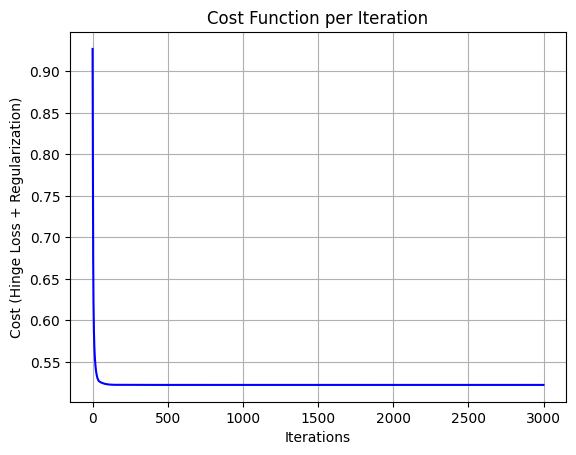

In [131]:
plt.plot(range(iterations), cost_arr, color='blue')
plt.title('Cost Function per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost (Hinge Loss + Regularization)')
plt.grid(True)
plt.show()

In [132]:
accuracy = np.mean(y_pred == y_adj[700:])
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.88%
